<a href="https://colab.research.google.com/github/Tsteer54/cmpt-120-Timothy-Steer/blob/main/State_of_the_Art_and_Decision_Tree_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Initial Data**

In [47]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import numpy as np
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

In [48]:
# Enter the correct filepath here if running on your own machine
df = pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv')
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [49]:
obesity_mapping = {
    "Insufficient_Weight": 0,
    "Normal_Weight": 1,
    "Overweight_Level_I": 2,
    "Overweight_Level_II": 3,
    "Obesity_Type_I": 4,
    "Obesity_Type_II": 5,
    "Obesity_Type_III": 6
}

# Creates a new column with the obesity mapping
df["NObeyesdadC"] = df["NObeyesdad"].map(obesity_mapping)

# Confirms that the new column was created and mapped correctly
print(df["NObeyesdadC"].head())

0    1
1    1
2    1
3    2
4    3
Name: NObeyesdadC, dtype: int64


In [50]:
# Calculates BMI and creates a new column
df["BMI"] = df["Weight"] / (df["Height"] ** 2) # weight in kg, height in meters

df.head()


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,NObeyesdadC,BMI
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight,1,24.386526
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight,1,24.238227
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight,1,23.765432
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I,2,26.851852
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II,3,28.342381


In [51]:
x = df.drop(columns=["NObeyesdad", "NObeyesdadC", "SMOKE", "Height", "Weight"])
y = df["NObeyesdadC"]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [52]:
# Automatizing the identification of numeric values that should be standardize and the categorical values to binarize
categorical_features = x.select_dtypes(include=['object']).columns.tolist() # Identifying columns with datatype OBJECT (that probably are strings)
numeric_features = x.select_dtypes(exclude=['object']).columns.tolist()     # Identifying columns with other datatype than OBJECT (that probably are numbers)

preprocessor = ColumnTransformer(
    transformers=[  ('num', StandardScaler(), numeric_features),
                    ('cat', OneHotEncoder(), categorical_features)  ])

# Fit and process the transformation of the training data and then of the testing set
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

In [53]:
# Reviewing which variables got a transformation
categorical_features, numeric_features


(['Gender',
  'family_history_with_overweight',
  'FAVC',
  'CAEC',
  'SCC',
  'CALC',
  'MTRANS'],
 ['Age', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE', 'BMI'])

In [54]:
# Changed the max_iter to 200 to avoid the warning message
logRModel = LogisticRegression(max_iter=200)
logRModel.fit(X_train_processed, y_train)
y_pred = logRModel.predict(X_test_processed)

# General predictions
general_accuracy = np.mean(y_pred == y_test)
print(f"General accuracy: {general_accuracy}")

General accuracy: 0.8865248226950354


In [55]:
cm = confusion_matrix(y_test, y_pred)
print(cm)


[[56  0  0  0  0  0  0]
 [10 42  7  3  0  0  0]
 [ 0  4 44  8  0  0  0]
 [ 0  0  4 43  3  0  0]
 [ 0  0  0  2 71  5  0]
 [ 0  0  0  0  2 56  0]
 [ 0  0  0  0  0  0 63]]


In [56]:
# Calculates precision
precision = precision_score(y_test, y_pred, average='weighted')  # Using weighted average for multi-class classification
print(f"Precision: {precision}")

Precision: 0.8899078652533294


In [57]:
# Calculates recall
recall = recall_score(y_test, y_pred, average='weighted')  # Using weighted average for multi-class classification
print(f"Recall: {recall}")


Recall: 0.8865248226950354


In [58]:

# Calculate F1-score
f1 = f1_score(y_test, y_pred, average='weighted')  # Weighted average for multi-class classification
print(f"F1-score: {f1}")

F1-score: 0.8844085239627352


# **Model: Decision Tree**

**Initial Model**

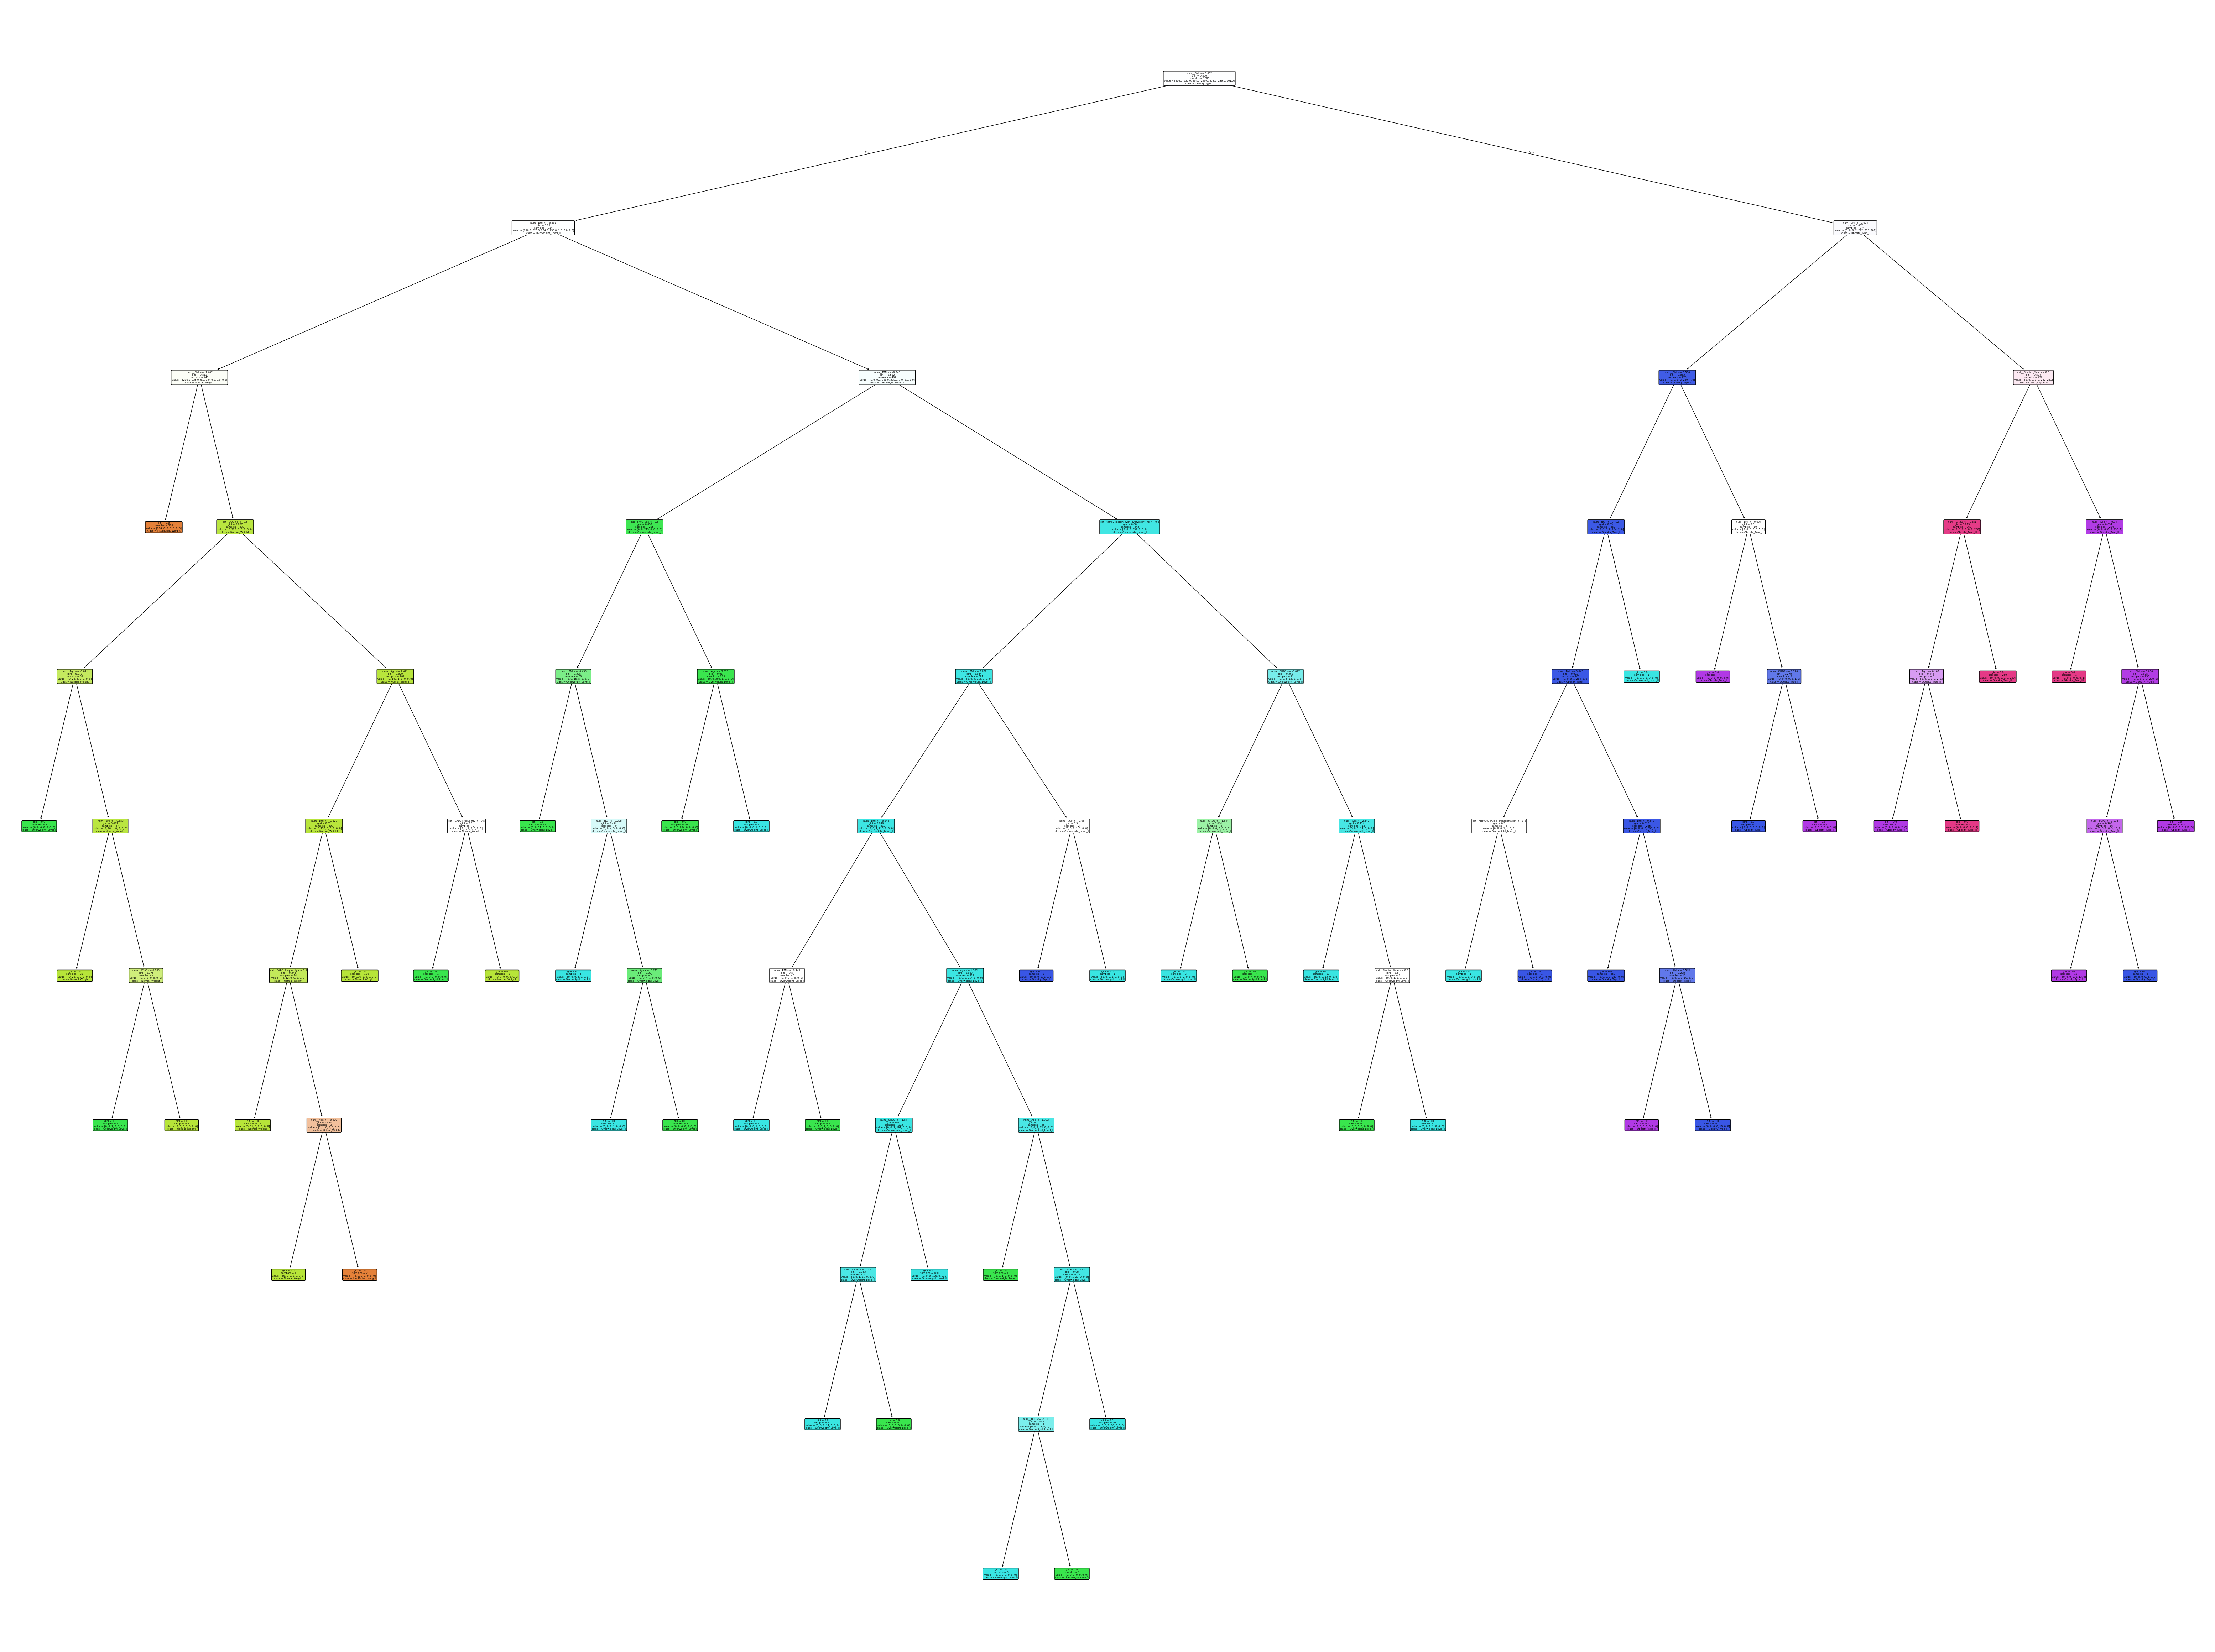

In [59]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Initialize the Decision Tree Classifier
tree_model = DecisionTreeClassifier(random_state=42) # Setting random_state for reproducibility

# Train the model on the processed training data
tree_model.fit(X_train_processed, y_train)

# Make predictions on the processed testing data
y_pred = tree_model.predict(X_test_processed)

# Visualize the Decision Tree
plt.figure(figsize=(80, 60))
class_names_list = list(obesity_mapping.keys())
plot_tree(tree_model, filled=True, feature_names=preprocessor.get_feature_names_out(), class_names=class_names_list, rounded=True)
plt.show()

**Accuracy of Model**

In [60]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the Decision Tree model: {accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy of the Decision Tree model: 0.9693

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97        56
           1       0.94      0.98      0.96        62
           2       0.98      0.93      0.95        56
           3       0.96      0.98      0.97        50
           4       0.99      0.95      0.97        78
           5       0.95      0.98      0.97        58
           6       0.98      1.00      0.99        63

    accuracy                           0.97       423
   macro avg       0.97      0.97      0.97       423
weighted avg       0.97      0.97      0.97       423


Confusion Matrix:
[[54  2  0  0  0  0  0]
 [ 1 61  0  0  0  0  0]
 [ 0  2 52  2  0  0  0]
 [ 0  0  1 49  0  0  0]
 [ 0  0  0  0 74  3  1]
 [ 0  0  0  0  1 57  0]
 [ 0  0  0  0  0  0 63]]


**Hyperparameter Tuning**

In [61]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 3, 5]
}

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_processed, y_train)

print("Best Hyperparameters:", grid_search.best_params_)
best_tree = grid_search.best_estimator_

y_pred_tuned = best_tree.predict(X_test_processed)
print(f"\nTuned Decision Tree Accuracy: {accuracy_score(y_test, y_pred_tuned):.4f}")
print("\nTuned Classification Report:")
print(classification_report(y_test, y_pred_tuned))
print("\nTuned Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_tuned))

Best Hyperparameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}

Tuned Decision Tree Accuracy: 0.9740

Tuned Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        56
           1       0.94      1.00      0.97        62
           2       1.00      0.95      0.97        56
           3       0.98      0.98      0.98        50
           4       0.97      0.95      0.96        78
           5       0.93      0.98      0.96        58
           6       1.00      1.00      1.00        63

    accuracy                           0.97       423
   macro avg       0.98      0.97      0.97       423
weighted avg       0.97      0.97      0.97       423


Tuned Confusion Matrix:
[[54  2  0  0  0  0  0]
 [ 0 62  0  0  0  0  0]
 [ 0  2 53  1  0  0  0]
 [ 0  0  0 49  1  0  0]
 [ 0  0  0  0 74  4  0]
 [ 0  0  0  0  1 57  0]
 [ 0  0  0  0  0  0 63]]


# **State of the Art**







**Initial Code**

In [62]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from warnings import filterwarnings
filterwarnings('ignore')  # for clean notebook


# Getting data using read_csv
dataset = pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv')


# Displaying first five rows
dataset.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [63]:
# Making copy of dataset
df = dataset.copy(deep = True)

new_columns = ['Gender', 'Age', 'Height', 'Weight', 'Family_history_with_overweight', 'FCOHCF', 'FCOV', 'NMM', 'COFBM', 'Smoke', 'CH2O', 'Calorie_Consump_Monitoring', 'Physical_Activity_F', 'Time_using_techno_D', 'Consumption_Alc', 'MTRANS', 'NObesity']
print('Length of new columns :- ',len(new_columns))

Length of new columns :-  17


In [64]:
# Assigning new names to columns
df.columns = new_columns

In [65]:
# Statistical insights of catagorical columns
df.describe(include=object)

,Gender,Family_history_with_overweight,FCOHCF,COFBM,Smoke,Calorie_Consump_Monitoring,Consumption_Alc,MTRANS,NObesity
count,2111,2111,2111,2111,2111,2111,2111,2111,2111
unique,2,2,2,4,2,2,4,5,7
top,Male,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_I
freq,1068,1726,1866,1765,2067,2015,1401,1580,351


In [66]:
# Drop missing values - Check
df.dropna(inplace=True)

# Check for any remaining duplicates values
df.duplicated().any()

np.True_

In [67]:
# Drpping duplicates if any
df.drop_duplicates(inplace=True)

df.shape # 24 duplicated values are removed

(2087, 17)

In [68]:
for cols in df.columns:
    if df[cols].dtype == object :       # Selecting only numerical column
        continue
    else:
        Q1 = df[cols].quantile(q=0.25)
        Q3 = df[cols].quantile(q=0.75)
        iqr = Q3-Q1

        low = Q1 - 1.5*(Q3-Q1)
        high = Q3 + 1.5*(Q3-Q1)
        df.loc[(df[cols]<low) | (df[cols]>high),cols] = df[cols].median()   # Replacing outliers with median


In [69]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[df.select_dtypes(include=['int','float']).columns] = scaler.fit_transform(df[df.select_dtypes(include=['int','float']).columns])  # Selecting only numerical features
df.head()

,Gender,Age,Height,Weight,Family_history_with_overweight,FCOHCF,FCOV,NMM,COFBM,Smoke,CH2O,Calorie_Consump_Monitoring,Physical_Activity_F,Time_using_techno_D,Consumption_Alc,MTRANS,NObesity
0,Female,-0.473866,-0.887864,-0.873605,yes,no,-0.788364,0.183899,Sometimes,no,-0.007810,no,-1.186977,0.554211,no,Public_Transportation,Normal_Weight
1,Female,-0.473866,-1.963531,-1.179922,yes,no,1.082164,0.183899,Sometimes,yes,1.636552,yes,2.328908,-1.090505,Sometimes,Public_Transportation,Normal_Weight
2,Male,0.007852,1.048338,-0.375838,yes,no,-0.788364,0.183899,Sometimes,no,-0.007810,no,1.156947,0.554211,Frequently,Public_Transportation,Normal_Weight
3,Male,0.971287,1.048338,0.007059,no,no,1.082164,0.183899,Sometimes,no,-0.007810,no,1.156947,-1.090505,Frequently,Walking,Overweight_Level_I
4,Male,-0.233007,0.833204,0.114270,no,no,-0.788364,0.183899,Sometimes,no,-0.007810,no,-1.186977,-1.090505,Sometimes,Public_Transportation,Overweight_Level_II


In [70]:
scaled = pd.DataFrame(df[df.select_dtypes(include=['int','float']).columns])
scaled.columns = list(df.select_dtypes(include=['int','float']).columns)

In [71]:
df.dtypes=='object'

,0
Gender,True
Age,False
Height,False
Weight,False
Family_history_with_overweight,True
FCOHCF,True
FCOV,False
NMM,False
COFBM,True
Smoke,True


In [72]:
df['Gender'], c =pd.factorize(df['Gender'])
df['Family_history_with_overweight'], c = pd.factorize(df['Family_history_with_overweight'])
df['FCOHCF'], c = pd.factorize(df['FCOHCF'])
df['Smoke'], c = pd.factorize(df['Smoke'])
df['Calorie_Consump_Monitoring'], c = pd.factorize(df['Calorie_Consump_Monitoring'])

In [73]:
def dummies(x,df):
    temp = pd.get_dummies(df[x], drop_first = True)
    df = pd.concat([df, temp], axis = 1)
    df.drop([x], axis = 1, inplace = True)
    return df


from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['NObesity'] = le.fit_transform(df['NObesity'])
df['COFBM'] = le.fit_transform(df['COFBM'])
df['Consumption_Alc'] = le.fit_transform(df['Consumption_Alc'])
df['MTRANS'] = le.fit_transform(df['MTRANS'])

In [74]:
df['NObesity']

,NObesity
0,1
1,1
2,1
3,5
4,6
...,...
2106,4
2107,4
2108,4
2109,4


In [75]:
# Now we will devide our dataframe into X and y.
# X -----> Independant features
# y -----> Target feature

X = df.iloc[:,:-1]
y = df['NObesity']

In [76]:
# Importing scipy for statistical functions
from scipy import stats

# Skewness of data
print('The skewness of data is :-\n',stats.skew(X))

The skewness of data is :-
 [-0.01629187  0.81520832 -0.03329851  0.23137158  1.7116574  -2.39170569
 -0.44787879 -2.86901571 -2.09262877  6.66733494 -0.10625321  4.33448963
  0.49396513  0.60878693  0.22469951 -1.26600866]


In [77]:
# Kurtosis of data
print('The kurtosis of data is :-\n',stats.kurtosis(X))

# Checking outliers using z-score
z_score = np.abs(stats.zscore(X))
df[(z_score > 3).all(axis=1)]

z_score

The kurtosis of data is :-
 [-1.99973458  0.23664082 -0.57462875 -0.73792304  0.92977105  3.72025611
 -0.62491844 13.5013899   5.78057282 42.45335514 -0.86441793 16.78780031
 -0.63930715 -0.55515889 -0.33812161 -0.23060541]


array([[1.00817911, 0.47386602, 0.88786366, ..., 0.55421113, 1.41183596,
        0.50676794],
       [1.00817911, 0.47386602, 1.96353116, ..., 1.09050525, 0.52283354,
        0.50676794],
       [0.99188724, 0.00785179, 1.04833782, ..., 0.55421113, 2.45750303,
        0.50676794],
       ...,
       [1.00817911, 0.10678838, 0.5342333 , ..., 0.02754479, 0.52283354,
        0.50676794],
       [1.00817911, 0.3358862 , 0.39702116, ..., 0.12664389, 0.52283354,
        0.50676794],
       [1.00817911, 0.16795287, 0.39041656, ..., 0.08404757, 0.52283354,
        0.50676794]])

In [78]:
norm_data = pd.DataFrame()
norm_data['Atributes'] = X.columns
norm_data['Skewness'] = stats.skew(X)
norm_data['Kurtosis'] = stats.kurtosis(X)

norm_data

,Atributes,Skewness,Kurtosis
0,Gender,-0.016292,-1.999735
1,Age,0.815208,0.236641
2,Height,-0.033299,-0.574629
3,Weight,0.231372,-0.737923
4,Family_history_with_overweight,1.711657,0.929771
5,FCOHCF,-2.391706,3.720256
6,FCOV,-0.447879,-0.624918
7,NMM,-2.869016,13.501390
8,COFBM,-2.092629,5.780573
9,Smoke,6.667335,42.453355


In [79]:
# Performing feature selection using Decision Tree
from sklearn.tree import DecisionTreeClassifier
FS_dt = DecisionTreeClassifier(max_depth=10).fit(X, y)


# Creating a dataframe of feature_importances_
feature_select = pd.DataFrame()
feature_select['Features'] = X.columns
feature_select['feature_importances_'] = FS_dt.feature_importances_
feature_select.sort_values(by='feature_importances_', ascending=False)

,Features,feature_importances_
3,Weight,0.472868
2,Height,0.219748
0,Gender,0.162460
1,Age,0.041458
14,Consumption_Alc,0.024900
5,FCOHCF,0.019895
6,FCOV,0.019225
8,COFBM,0.013437
10,CH2O,0.008341
13,Time_using_techno_D,0.005224


In [80]:
# Selecting only imp features
l = ['Weight','Height','Gender','Age','Consumption_Alc','FCOHCF','FCOV','COFBM','Physical_Activity_F','MTRANS','CH2O','Time_using_techno_D','Smoke']
scaled_x = X[l]

# Dropping columns
#scaled = scaled_x.drop(columns=['NMM'],axis=1)


# Randomly sampling dataset into train and test set

from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(scaled_x, y, test_size=0.2, random_state=40)


print('Shape of train_X is',train_X.shape)
print('Shape of train_y is',train_y.shape)
print('Shape of test_X is',test_X.shape)
print('Shape of test_y is',test_y.shape)

Shape of train_X is (1669, 13)
Shape of train_y is (1669,)
Shape of test_X is (418, 13)
Shape of test_y is (418,)


In [81]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Creating a logistic regression model
logistic_model = LogisticRegression()
logistic_model.fit(train_X, train_y)  # Fitting the model

LogisticRegression()

In [82]:
# Determining score of test and train dataset
print('Training score is:- %0.2f' %logistic_model.score(train_X, train_y))
print('Testing score is:- %0.2f' % logistic_model.score(test_X, test_y))

Training score is:- 0.87
Testing score is:- 0.89


In [83]:
# Predicting the model
pred_logistic = logistic_model.predict(test_X)

# Determining accuracy of model using confusion matrix
result_logistic = confusion_matrix(test_y, pred_logistic)
result_logistic

array([[47,  0,  0,  0,  0,  0,  0],
       [ 6, 49,  0,  0,  0,  2,  1],
       [ 0,  0, 71,  6,  0,  0,  1],
       [ 0,  0,  0, 59,  0,  0,  0],
       [ 0,  0,  0,  0, 62,  0,  0],
       [ 0,  0,  0,  0,  0, 38, 11],
       [ 0,  0,  7,  0,  0, 10, 48]])

In [84]:
# Accuracy using accuracy_score
logistic_model_accuarcy = accuracy_score(test_y, pred_logistic)
print('logistic_model_accuarcy:- %0.2f' % logistic_model_accuarcy)

logistic_model_CR = classification_report(test_y, pred_logistic)
print(logistic_model_CR)

logistic_model_accuarcy:- 0.89
              precision    recall  f1-score   support

           0       0.89      1.00      0.94        47
           1       1.00      0.84      0.92        58
           2       0.91      0.91      0.91        78
           3       0.91      1.00      0.95        59
           4       1.00      1.00      1.00        62
           5       0.76      0.78      0.77        49
           6       0.79      0.74      0.76        65

    accuracy                           0.89       418
   macro avg       0.89      0.90      0.89       418
weighted avg       0.90      0.89      0.89       418



**Decision Tree**

In [85]:
# Creating DT model
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(max_depth=4)

# Training the model
dt_model.fit(train_X, train_y)

DecisionTreeClassifier(max_depth=4)

In [86]:
# Determining score of test and train dataset
print('Training score is:- %0.2f' % dt_model.score(train_X, train_y))
print('Testing score is:- %0.2f' % dt_model.score(test_X, test_y))

Training score is:- 0.78
Testing score is:- 0.77


In [87]:
# Predicting the model
pred_dt = dt_model.predict(test_X)

# Determining accuracy of model using confusion matrix
result_dt = confusion_matrix(test_y, pred_dt)
result_dt

array([[42,  5,  0,  0,  0,  0,  0],
       [ 6, 32,  0,  0,  0, 16,  4],
       [ 0,  0, 47, 12,  0,  2, 17],
       [ 0,  0,  3, 56,  0,  0,  0],
       [ 0,  0,  0,  0, 62,  0,  0],
       [ 0,  4,  0,  0,  0, 29, 16],
       [ 0,  0,  3,  0,  0,  7, 55]])

In [88]:
# Accuracy using accuracy_score
dt_model_accuarcy = accuracy_score(test_y, pred_dt)
print('dt_model_accuarcy:- %0.2f' % dt_model_accuarcy)


dt_model_CR = classification_report(test_y, pred_dt)
print(dt_model_CR)

dt_model_accuarcy:- 0.77
              precision    recall  f1-score   support

           0       0.88      0.89      0.88        47
           1       0.78      0.55      0.65        58
           2       0.89      0.60      0.72        78
           3       0.82      0.95      0.88        59
           4       1.00      1.00      1.00        62
           5       0.54      0.59      0.56        49
           6       0.60      0.85      0.70        65

    accuracy                           0.77       418
   macro avg       0.79      0.78      0.77       418
weighted avg       0.79      0.77      0.77       418



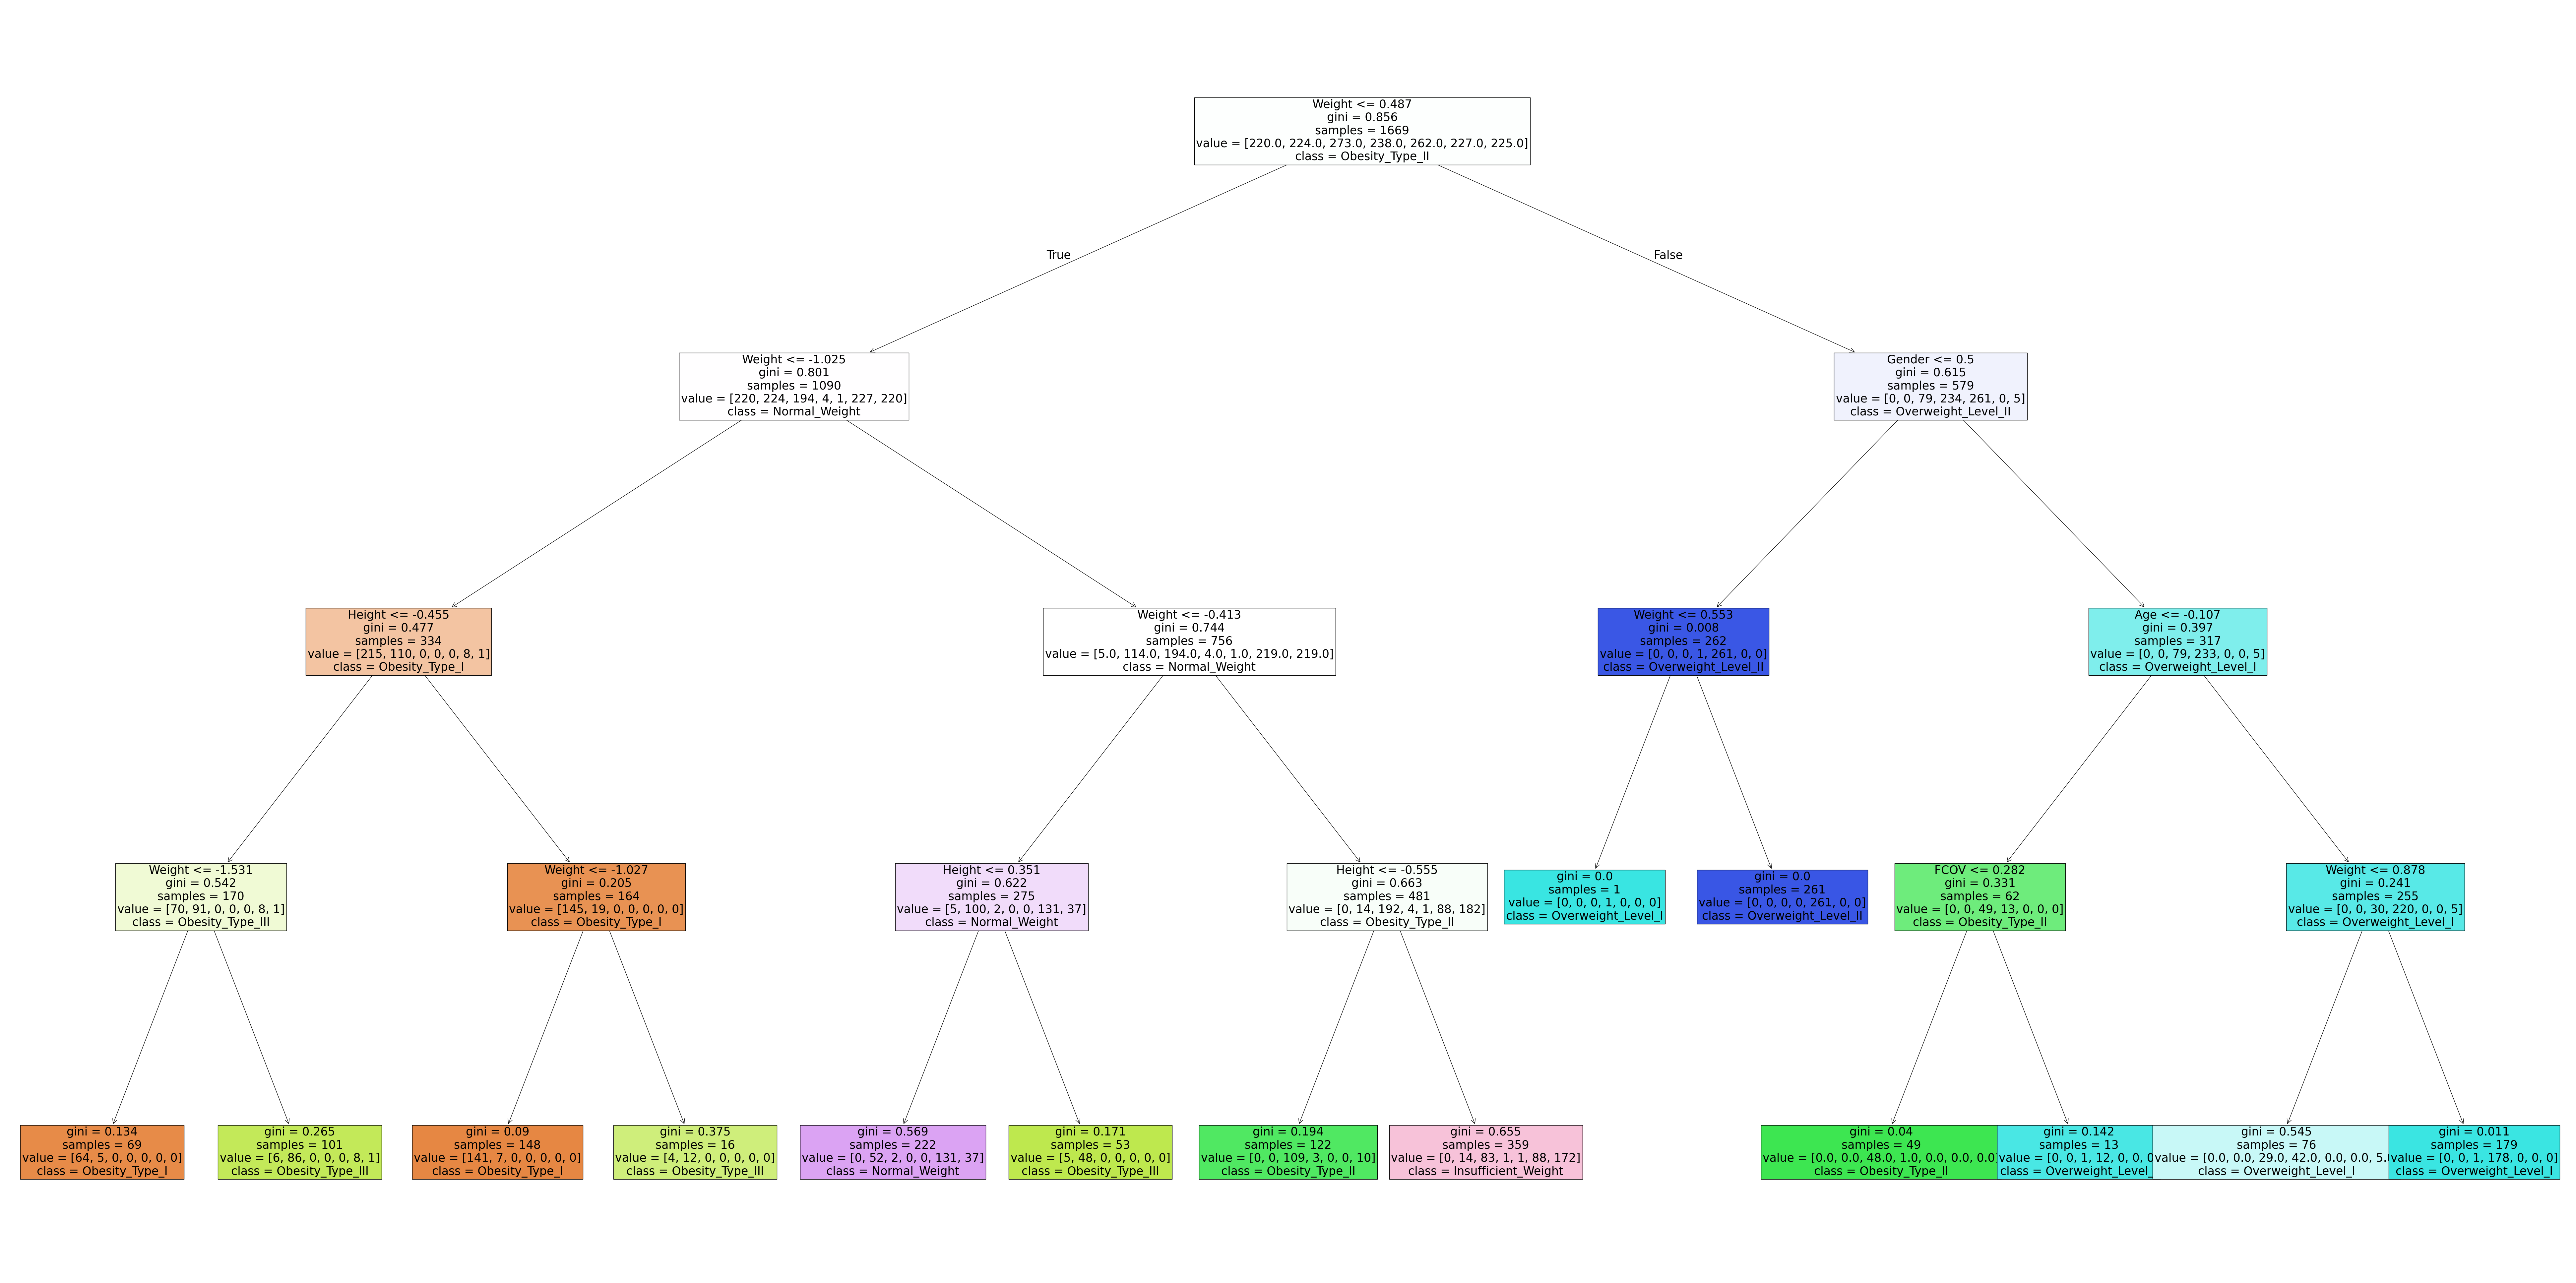

In [89]:
from sklearn import tree
fig = plt.figure(figsize=(100,50))
names = scaled_x.columns
class1 = ['Obesity_Type_I', 'Obesity_Type_III', 'Obesity_Type_II', 'Overweight_Level_I', 'Overweight_Level_II', 'Normal_Weight', 'Insufficient_Weight']

_ = tree.plot_tree(dt_model,
                   feature_names=names,
                   class_names=class1,
                   impurity=True,
                   filled=True,
                   fontsize=25)
fig.savefig("decision_tree.png")  # Saving the tree as an image file